<a href="https://colab.research.google.com/github/nedokormysh/OpenEdu_HSE_INTRML/blob/week6/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Логистическая регрессия

1. Загрузите данные `load_wine` из `sklearn.datasets`. Из данных исключите объекты класса 2.
 Отмасштабируйте признаки, используя класс `StandardScaler` с гиперпараметрами по умолчанию. Обучите логистическую регрессию и оцените важность признаков. Укажите название признака, который оказался наименее значимым.

Обратите внимание, целевое значение лежит по ключу `'target'`, матрица объекты-признаки лежит по ключу `'data'`



In [1]:
from sklearn.datasets import load_wine
data = load_wine()
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [2]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
# retrieved_data_target = list(filter(lambda x: '2' in x, data.target))
# print(retrieved_data_target)

In [11]:
list(data.target).index(2)

130

In [18]:
y = data.target[:130]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
X = data.data[:130]
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.179e+01, 2.130e+00, 2.780e+00, ..., 9.700e-01, 2.440e+00,
        4.660e+02],
       [1.237e+01, 1.630e+00, 2.300e+00, ..., 8.900e-01, 2.780e+00,
        3.420e+02],
       [1.204e+01, 4.300e+00, 2.380e+00, ..., 7.900e-01, 2.570e+00,
        5.800e+02]])

In [23]:
import numpy as np
np.where(data['target'] == 2)

(array([130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177]),)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[ 1.452455  , -0.29441432,  0.30247764, ..., -0.11242761,
         2.04002469,  0.782868  ],
       [ 0.28906609, -0.21455828, -0.67719651, ..., -0.05291788,
         0.94143735,  0.74015178],
       [ 0.24388594,  0.4471061 ,  1.11324246, ..., -0.17193734,
         0.45552372,  1.12459784],
       ...,
       [-1.30353427,  0.18472195,  1.484843  , ..., -0.52899571,
        -1.0867239 , -0.92293343],
       [-0.64842207, -0.38567837, -0.13668663, ..., -1.00507355,
        -0.36841679, -1.27605426],
       [-1.02115832,  2.66025935,  0.13356831, ..., -1.60017084,
        -0.81207706, -0.59829008]])

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [28]:
clf.coef_.ravel()

array([-1.54159556, -0.49400041, -0.97150156,  1.23984657, -0.23754033,
       -0.03352988, -0.33050451,  0.17508679,  0.18676656, -0.79642193,
        0.15133522, -0.62736253, -1.81341988])

In [29]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [30]:
zip(clf.coef_.ravel(), data.feature_names)

In [31]:
sorted_weights = sorted(zip(clf.coef_.ravel(), data.feature_names), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]

In [32]:
weights

[1.2398465717380684,
 0.18676655878646917,
 0.17508679113729345,
 0.1513352218371105,
 -0.03352987898328598,
 -0.23754032749084616,
 -0.3305045105487258,
 -0.49400041318976895,
 -0.6273625275814775,
 -0.7964219254092199,
 -0.9715015646611119,
 -1.541595563309345,
 -1.813419883792371]

In [35]:
features

['alcalinity_of_ash',
 'proanthocyanins',
 'nonflavanoid_phenols',
 'hue',
 'total_phenols',
 'magnesium',
 'flavanoids',
 'malic_acid',
 'od280/od315_of_diluted_wines',
 'color_intensity',
 'ash',
 'alcohol',
 'proline']

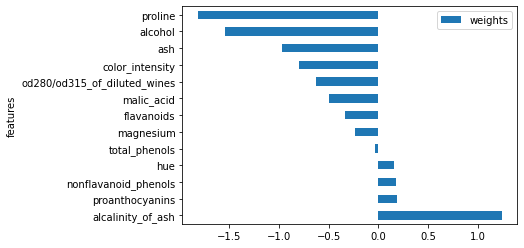

In [34]:
import pandas as pd
df = pd.DataFrame({'features': features, 'weights':weights})
ax = df.plot.barh(x='features', y='weights', rot=0, )

 total_phenols


2. Загрузите данные `load_wine` из `sklearn.datasets`. Из обучающей части исключите объекты соответствующие классу 2. Не масштабируйте признаки. Обучите логистическую регрессию с гиперпараметрами по умолчанию.
Выберите признак из предложенных, которому соответствует минимальный вес. 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


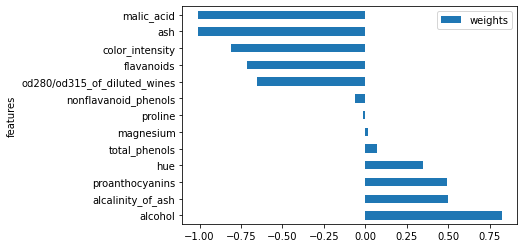

In [42]:
data = load_wine()

y = data.target[:130]
X = data.data[:130]

clf_not_scaled_data = LogisticRegression()
clf_not_scaled_data.fit(X, y)

sorted_weights_not_sc = sorted(zip(clf_not_scaled_data.coef_.ravel(), data.feature_names), reverse=True)
weights_not_sc = [x[0] for x in sorted_weights_not_sc]
features_not_sc = [x[1] for x in sorted_weights_not_sc]

df = pd.DataFrame({'features': features_not_sc, 'weights': weights_not_sc})
ax = df.plot.barh(x='features', y='weights', rot=0)

alcohol


ответ неверный. Видимо нужно было по модулю брать.

3. Решается задача бинарной классификации. Дана матрица объекты признаки 𝑋 и ответы для объектов  𝑦. Обучите логистическую регрессию и предскажите класс объекта x_new

In [43]:
X = np.array([[1, 1], [0.3, 0.7], [0, 4], [-2, -7], [0, -2], [-1, -1], [-2, 0]])
y = np.array([1, 1, 1, 0, 0, 0, 0])
x_new = np.array([[-5, 1]])

In [44]:
clf_bin = LogisticRegression()
clf_bin.fit(X, y)
clf_bin.predict(x_new)

array([0])

0

### Классификация текстов

4. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. Укажите полученное число признаков.


Чтобы загрузить данные, скачайте файл по ссылке. Если вы используете google colab, то пример загрузки данных приведен ниже.

In [ ]:
import pandas as pd
from google.colab import files
uploder = files.upload()

In [47]:
data_4 = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/OpenEdu_HSE_INTRML/week6/SMSSpamCollection.csv', sep='\t', header=None)
data_4

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [50]:
# data_4.columns[-1:]

Int64Index([1], dtype='int64')

In [87]:
# data_4.loc[:, data_4.columns[1]]

In [54]:
data_4.loc[:, data_4.columns[1:2]]

,1
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [61]:
data_4.loc[:, data_4.columns[0:1]]

,0
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [62]:
X_4 = data_4.loc[:, data_4.columns[-1:]]
y_4 = data_4.loc[:, data_4.columns[:-1]]
X_train, X_test = X_4[:4000], X_4[4000:]
y_train, y_test = y_4[:4000], y_4[4000:]

In [66]:
import numpy as np
X_train = np.array(X_train).ravel()
X_test = np.array(X_test).ravel()

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
vectorizer_tfidf = TfidfVectorizer()
X_vect = vectorizer_tfidf.fit_transform(X_train)
X_vect.shape

(4000, 7331)

5.  Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, помимо слов входящих в тексты, учитывайте биграммы (используйте гиперпараметр `ngram_range`). Укажите полученное число признаков.

In [69]:
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1,2))
X_vect = vectorizer_tfidf.fit_transform(X_train)
X_vect.shape

(4000, 39805)

6. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, не учитывайте слова, которые встретились меньше 2 раз в обучающей выборке (используйте гиперпараметр `min_df`). Укажите полученное число признаков.

In [70]:
vectorizer_tfidf = TfidfVectorizer(min_df=2)
X_vect = vectorizer_tfidf.fit_transform(X_train)
X_vect.shape

(4000, 3377)

7. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. На полученных векторных представлениях обучите логистическую регрессию и оцените долю правильных ответов на тестовой части. Укажите полученное значение доли правильных ответов.

In [71]:
X_test.shape

(1572,)

In [97]:
data_7 = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/OpenEdu_HSE_INTRML/week6/SMSSpamCollection.csv', sep='\t', header=None)
# data_7

In [98]:
X_7 = data_7.loc[:, data_7.columns[-1:]]
y_7 = data_7.loc[:, data_7.columns[:-1]]
X_train, X_test = X_7[:4000], X_7[4000:]
y_train, y_test = y_7[:4000], y_7[4000:]

In [83]:
X_train[:]

,1
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
3995,I love to cuddle! I want to hold you in my str...
3996,R u in this continent?
3997,We'll you pay over like &lt;#&gt; yrs so its ...
3998,Bored housewives! Chat n date now! 0871750.77....


In [78]:
np.ravel(X_train)

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ...,
       "We'll you pay over like  &lt;#&gt; yrs so its not too difficult",
       'Bored housewives! Chat n date now! 0871750.77.11! BT-national rate 10p/min only from landlines!',
       'We tried to call you re your reply to our sms for a video mobile 750 mins UNLIMITED TEXT free camcorder Reply or call now 08000930705 Del Thurs'],
      dtype=object)

In [99]:
X_train = np.array(X_train).ravel()
y_train = np.array(y_train).ravel()
X_test = np.array(X_test).ravel()
y_test = np.array(y_test).ravel()

In [100]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [101]:
vectorizer_tf_idf = TfidfVectorizer()
X_train_vect = vectorizer_tfidf.fit(X_train)
X_train_vect = vectorizer_tfidf.fit_transform(X_train)
X_test_vect = vectorizer_tfidf.transform(X_test)
y_train_bin = y_train.map({'spam': 1, 'ham': 0})
y_test_bin = y_test.map({'spam': 1, 'ham': 0})

In [102]:
clf_7 = LogisticRegression()
clf_7.fit(X_train_vect, y_train_bin)
y_pred = clf_7.predict(X_test_vect)

from sklearn.metrics import accuracy_score

accuracy_score(y_test_bin, y_pred)

0.9701017811704835